# 4.1 Classifying Movie Reviews: A Binary Example
## 4.1.1 Loading Dataset

In [1]:
from keras import datasets as kds

# num_words is the most frequent words
(train_data, train_labels), (test_data, test_labels) = kds.imdb.load_data(
    num_words=10_000
)

print(train_data[0][:20])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]
1


## 4.1.2 Decoding Reviews
As shown in 4.1.1 - the training and testing data is encoded as is. We can decode.

In [2]:
word_idx = kds.imdb.get_word_index()
reverse_word_idx = dict([(v, k) for (k, v) in word_idx.items()])
# Indices are offset by 4 because first 3 indices are reserved for "padding", "start of sequence", and "unknown"
decoded_review = " ".join([reverse_word_idx.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## 4.1.3 Preparing the Data
We can't directly pass list of values into our NN - as it expects to process contigious batches of data. We have to convert our lists into tensors. We cover embedding later - for now we will use multi-hot encoding.

In [3]:
import numpy as np


def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros(shape=(len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results


# vectorize reviews
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize labels
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

del train_data, test_data

## 4.1.5.1 First Model
A plain stack of densely connected layers with relu activations. Model overfits.

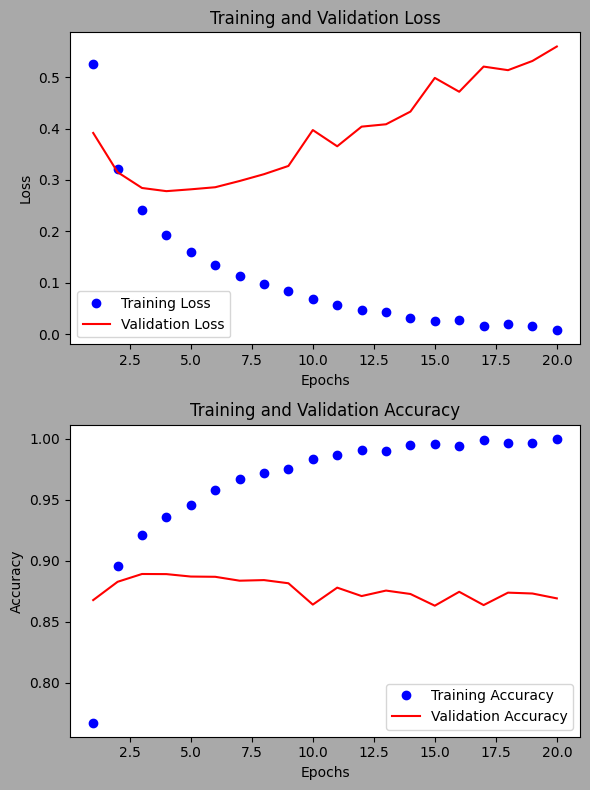

In [4]:
import keras
from keras import layers

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

mpl.rcParams["figure.facecolor"] = "darkgray"
mpl.rcParams["axes.facecolor"] = "white"


### 4.1.5.1 Seperate validation/training sets and fit model
def fit_and_plot_results(model, x_train, y_train, val_ratio=0.4, verbose=0):
    validation_idx = int(np.floor(val_ratio * x_train.shape[0]))
    x_val, y_val = x_train[:validation_idx], y_train[:validation_idx]
    x_train_partial, y_train_partial = (
        x_train[validation_idx:],
        y_train[validation_idx:],
    )
    history = model.fit(
        x_train_partial,
        y_train_partial,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=verbose,
    )

    ### 4.1.5.2 Review Results
    ### The model performs substantially better on training data than it does on validation - indicating overfitting.
    history_dct = history.history

    loss_values = history_dct["loss"]
    val_loss_values = history_dct["val_loss"]
    acc = history_dct["accuracy"]
    val_acc = history_dct["val_accuracy"]
    epochs = range(1, len(loss_values) + 1)

    # Set up the figure and GridSpec
    fig = plt.figure(figsize=(6, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])

    # First subplot (Training and validation loss)
    ax0 = plt.subplot(gs[0])
    ax0.plot(epochs, loss_values, "bo", label="Training Loss")
    ax0.plot(epochs, val_loss_values, "r", label="Validation Loss")
    ax0.set_title("Training and Validation Loss")
    ax0.set_xlabel("Epochs")
    ax0.set_ylabel("Loss")
    ax0.legend()

    # Second subplot (Training and validation accuracy)
    ax1 = plt.subplot(gs[1])
    ax1.plot(epochs, acc, "bo", label="Training Accuracy")
    ax1.plot(epochs, val_acc, "r", label="Validation Accuracy")
    ax1.set_title("Training and Validation Accuracy")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")
    ax1.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()


l1 = layers.Dense(units=16, activation="relu")
l2 = layers.Dense(units=16, activation="relu")
ouput_layer = layers.Dense(units=1, activation="sigmoid")


model = keras.Sequential()
model.add(l1)
model.add(l2)
model.add(ouput_layer)

# Binary crossentropy is usually best when dealing with models that output probabilities
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

fit_and_plot_results(model, x_train, y_train)

## 4.1.5.3 - test different structures

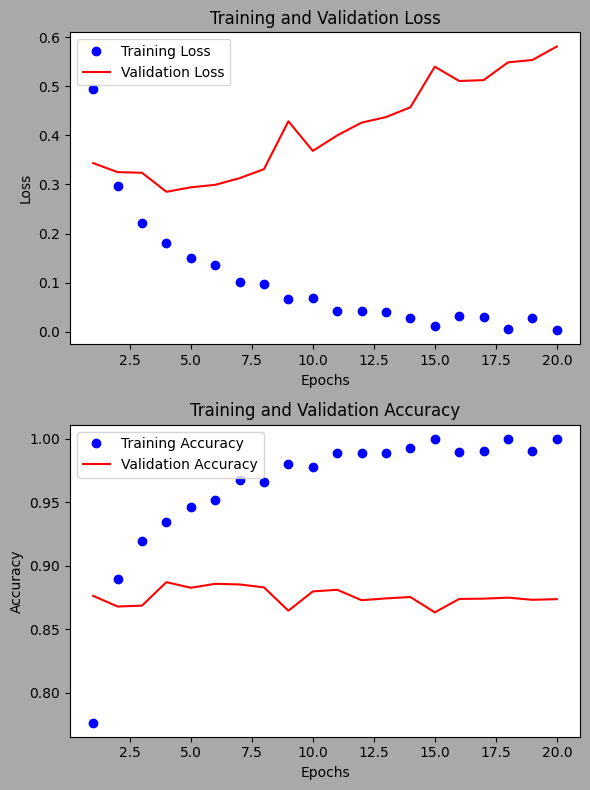

In [5]:
l1 = layers.Dense(units=64, activation="relu")
l2 = layers.Dense(units=32, activation="relu")
ouput_layer = layers.Dense(units=1, activation="sigmoid")

model = keras.Sequential()
model.add(l1)
model.add(l2)
model.add(ouput_layer)

# Binary crossentropy is usually best when dealing with models that output probabilities
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

fit_and_plot_results(model, x_train, y_train)

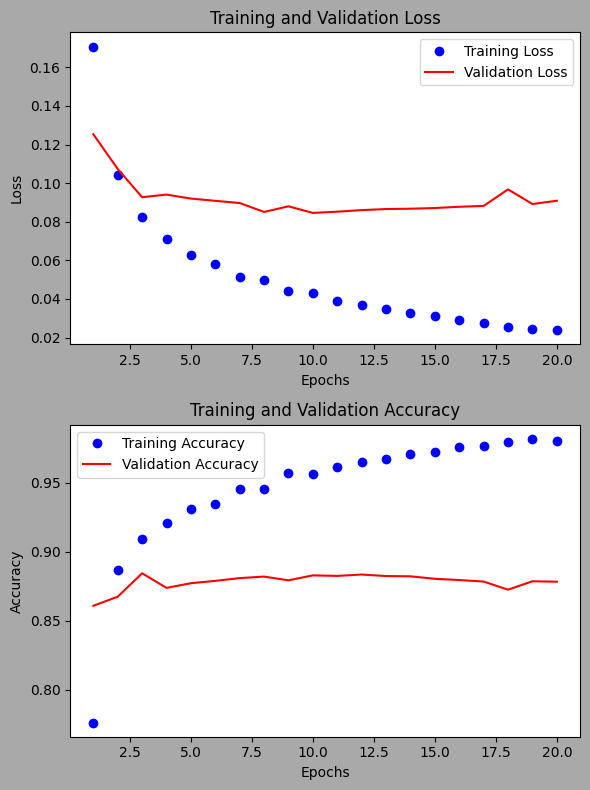

In [6]:
l1 = layers.Dense(units=64, activation="relu")
l2 = layers.Dense(units=32, activation="relu")
ouput_layer = layers.Dense(units=1, activation="sigmoid")

model = keras.Sequential()
# model.add(l1)
model.add(l2)
model.add(ouput_layer)

# Binary crossentropy is usually best when dealing with models that output probabilities
model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])

fit_and_plot_results(model, x_train, y_train)

# 4.2 Classifying Newswires: A multiclass classification example

In [7]:
(train_data, train_labels), (test_data, test_labels) = kds.reuters.load_data(
    path="reuters.npz", num_words=10000
)

x_train, y_train = vectorize_sequences(train_data), keras.utils.to_categorical(
    train_labels
)
x_test, y_test = vectorize_sequences(test_data), keras.utils.to_categorical(test_labels)

del train_data, test_data

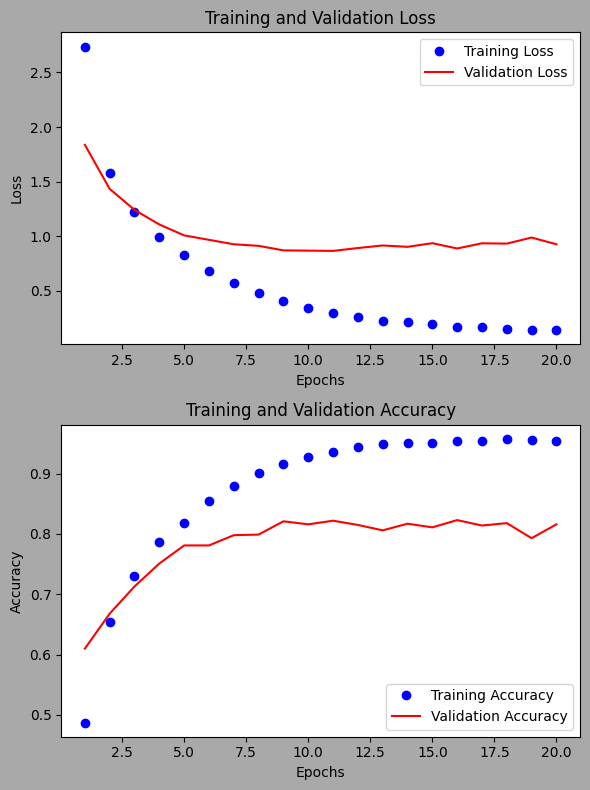

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7978 - loss: 1.0220
[1.0549659729003906, 0.7862867116928101]


In [8]:
n_categories = np.unique(test_labels).shape[0]


l1 = layers.Dense(units=64, activation="relu")
l2 = layers.Dense(units=64, activation="relu")
ouput_layer = layers.Dense(units=n_categories, activation="softmax")

model = keras.Sequential()
model.add(l1)
model.add(l2)
model.add(ouput_layer)

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)
val_ratio = 0.1114
fit_and_plot_results(model, x_train, y_train, val_ratio)
print(model.evaluate(x_test, y_test))

# 4.3 Predicting House Prices: A regression example

In [9]:
(train_data, train_targets), (test_data, test_targets) = kds.boston_housing.load_data(
    path="boston_housing.npz"
)

print(train_data.shape)
print(train_targets.shape)

(404, 13)
(404,)


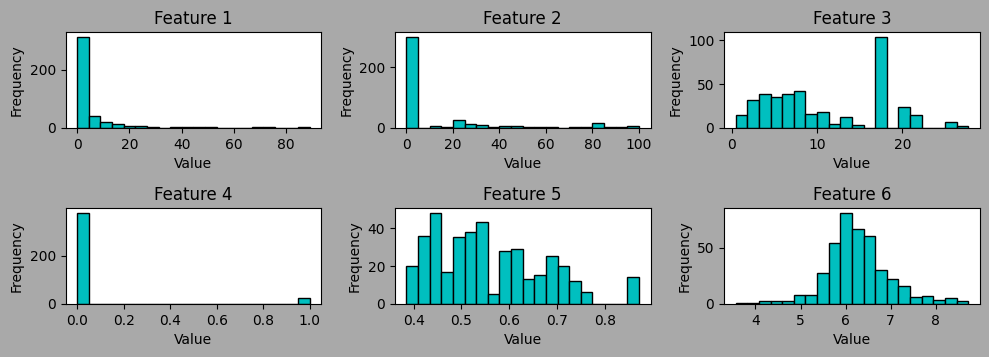

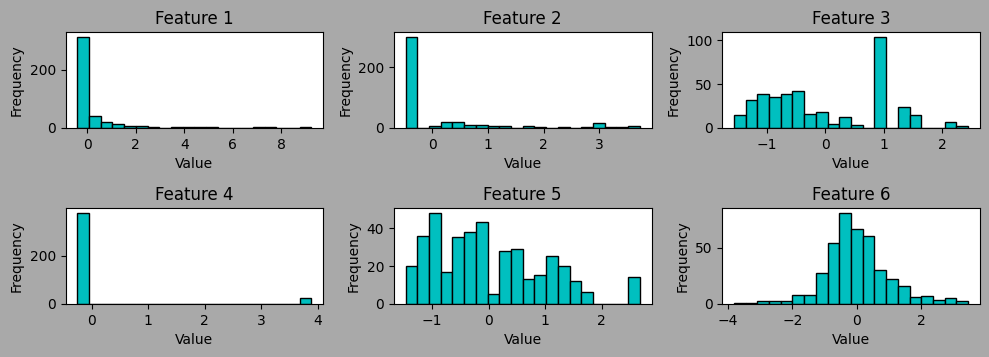

In [10]:
def z_score_norm(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    scaled_data = (data - data_mean) / data_std
    return scaled_data


def plot_feature_histograms(train_data, figsize=(15, 20)):

    # Get the number of columns/features in the training data
    num_features = train_data.shape[1]

    # Create subplots
    fig, axes = plt.subplots(nrows=num_features // 3 + 1, ncols=3, figsize=figsize)
    axes = axes.flatten()

    # Plot a histogram for each feature
    for i in range(num_features):
        ax = axes[i]
        ax.hist(train_data[:, i], bins=20, color="c", edgecolor="black")
        ax.set_title(f"Feature {i+1}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")

    # Adjust layout to remove empty subplots
    for i in range(num_features, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


plot_feature_histograms(train_data[:, :6], (10, 5))
plot_feature_histograms(z_score_norm(train_data[:, :6]), (10, 5))

## 4.3.1 Cross Validation

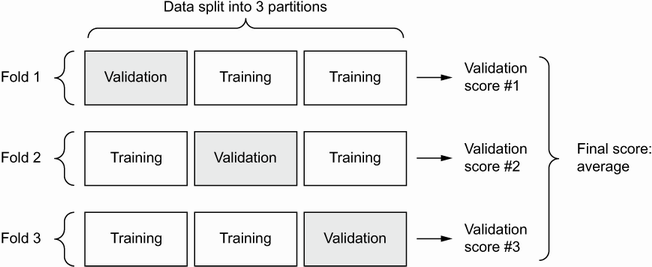

Because we have so few data points, we do not have a large validation set. This can be augmented using k fold validation.

In [11]:
from sklearn.model_selection import KFold


def build_model():
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model


n_epochs = 365
all_scores = {}
histories = {}

x_train, y_train = z_score_norm(train_data), train_targets
x_test, y_test = z_score_norm(test_data), test_targets

kf = KFold(n_splits=3)
for i, (train_idx, test_idx) in enumerate(kf.split(x_train, y_train)):
    x_train_partial, y_train_partial = x_train[train_idx], y_train[train_idx]
    x_val, y_val = x_train[test_idx], y_train[test_idx]
    model = build_model()
    history = model.fit(
        x_train_partial,
        y_train_partial,
        epochs=n_epochs,
        batch_size=16,
        validation_data=(x_val, y_val),
        verbose=0,
    )
    val_mse, val_mae = model.evaluate(x_val, y_val, verbose=0)
    histories[i] = history.history
    all_scores[i] = val_mae
    print(f"Fold {i} complete")

Fold 0 complete
Fold 1 complete
Fold 2 complete


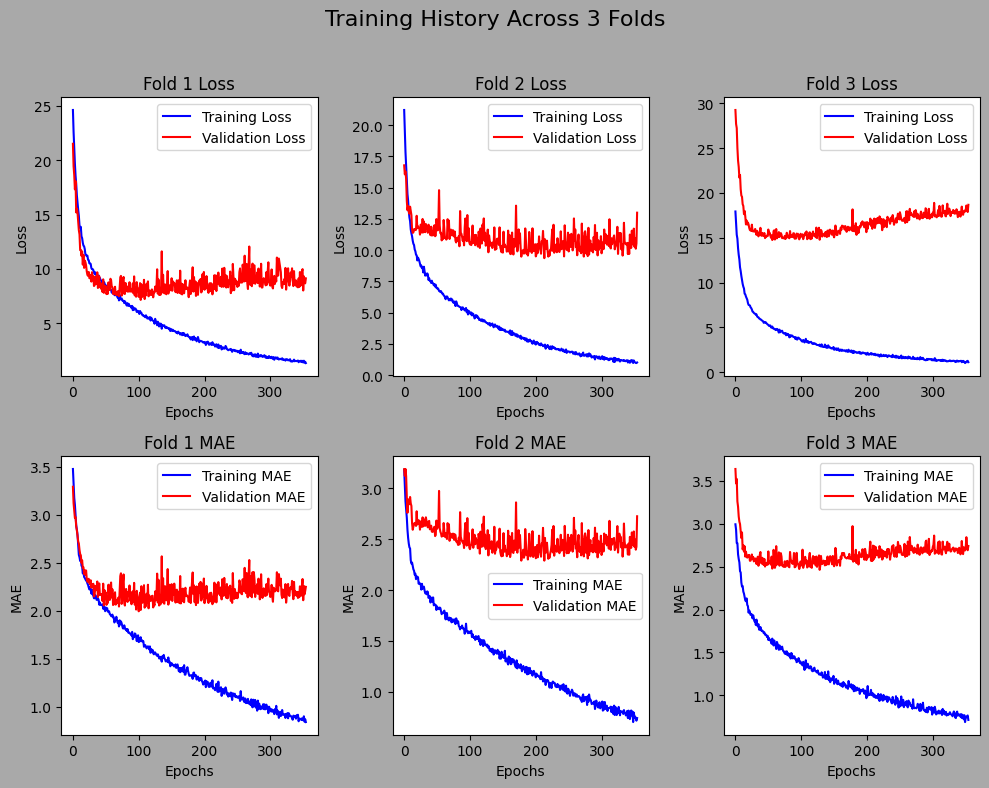

In [12]:
def plot_histories(histories, start_epoch=0):
    n_folds = len(histories)
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(2, n_folds, height_ratios=[1, 1])
    fig.suptitle("Training History Across 3 Folds", fontsize=16)

    for i in range(n_folds):
        history = histories[i]

        # Plot Loss
        ax_loss = plt.subplot(gs[0, i])
        ax_loss.plot(history["loss"][start_epoch:], label="Training Loss", color="blue")
        ax_loss.plot(
            history["val_loss"][start_epoch:], label="Validation Loss", color="red"
        )
        ax_loss.set_title(f"Fold {i+1} Loss")
        ax_loss.set_xlabel("Epochs")
        ax_loss.set_ylabel("Loss")
        ax_loss.legend()

        # Plot MAE
        ax_mae = plt.subplot(gs[1, i])
        ax_mae.plot(history["mae"][start_epoch:], label="Training MAE", color="blue")
        ax_mae.plot(
            history["val_mae"][start_epoch:], label="Validation MAE", color="red"
        )
        ax_mae.set_title(f"Fold {i+1} MAE")
        ax_mae.set_xlabel("Epochs")
        ax_mae.set_ylabel("MAE")
        ax_mae.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


plot_histories(histories, start_epoch=10)